In [3]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Initialize the x- and y-arrays that we will use to plot
x_axis = []
mean = []
variance = []
skew_list = []
kurt_list = []

In [5]:
# proposal
def q(lnx):
    # add a random number drawn from a gaussian whose mean is the current position and the standard deviation is 1
    # randn() draws from a normalized gausian whose mean is 0 and stdev is 1
    return lnx + randn()

We then define the density function p(x) and the log density function ln(p(x)).

p(x) is a Gaussian with mean 2 and variance 2. In other words:

$p(x)=\frac{1}{\sigma\sqrt{2\pi}} exp\left(-\frac{1}{2}(\frac{x-\mu}{\sigma})^2\right)$


In [6]:
# density function f(x) = 1 * p(x)
def f(x):
    mu = 2
    sigma = math.sqrt(2)
    return 1.0/(sigma*math.sqrt(2.0*pi)) * exp(-0.5 * ((x-mu)/sigma)**2)

In [7]:
# therefore, ln_p = ln_f is different
def ln_f(x):
    mu = 2
    sigma = math.sqrt(2)
    return math.log(1.0/(sigma*math.sqrt(2.0*pi))) - (0.5*((x-mu)/sigma)**2)

In [8]:
lnxs = [1.0]    # initialize MCMC algorithm with arbitrary starting value
pxs = [f(1.0)]  # initialize array of p(x)=f(x) values

# taking steps of ln(x) instead of x
for i in range(10000):
    lnx = lnxs[-1]
    lnx_new = q(lnx)
    accept_diff = ln_f(lnx_new) - ln_f(lnx)
    if math.log(rand()) < accept_diff:
        lnxs.append(lnx_new)
        pxs.append(f(lnx_new))
    else:
        lnxs.append(lnx)
        pxs.append(f(lnx))

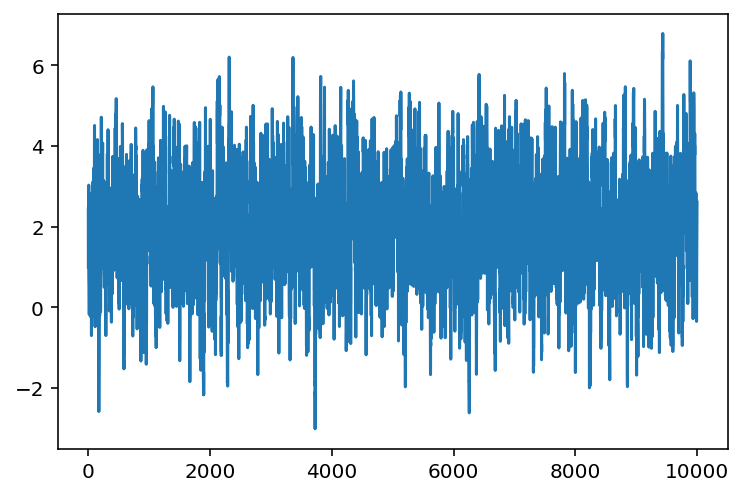

In [9]:
plot(lnxs)

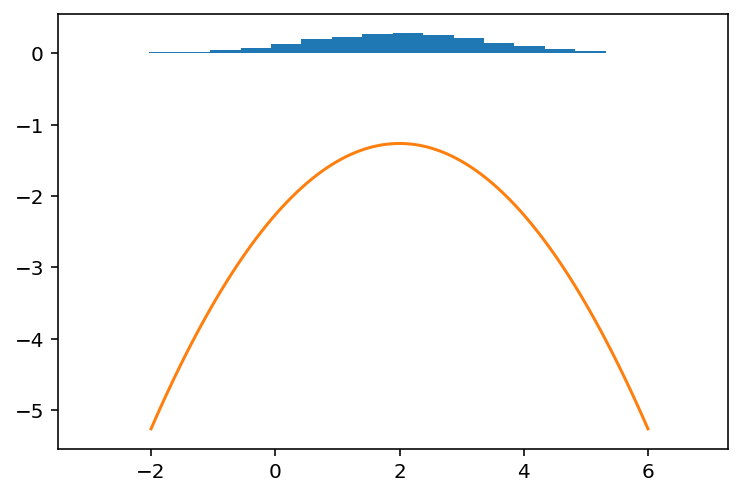

In [10]:
# histogram
hist(lnxs, density=True, bins=20)

# original gaussian distribution
xlist = np.linspace(-2,6,100)
ylist = ln_f(xlist)
plot(xlist, ylist)

# display the superimposed plots
show()